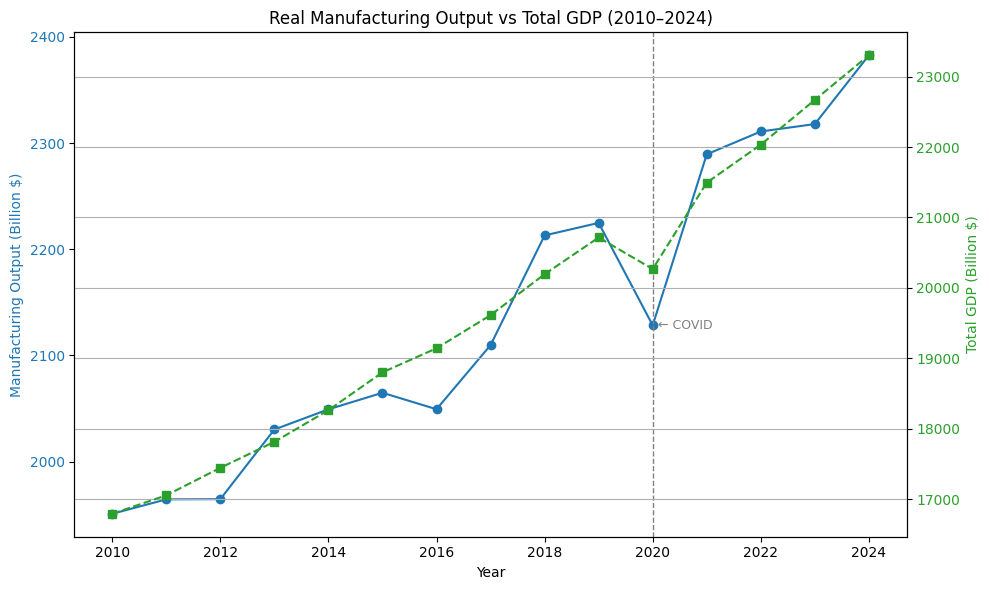

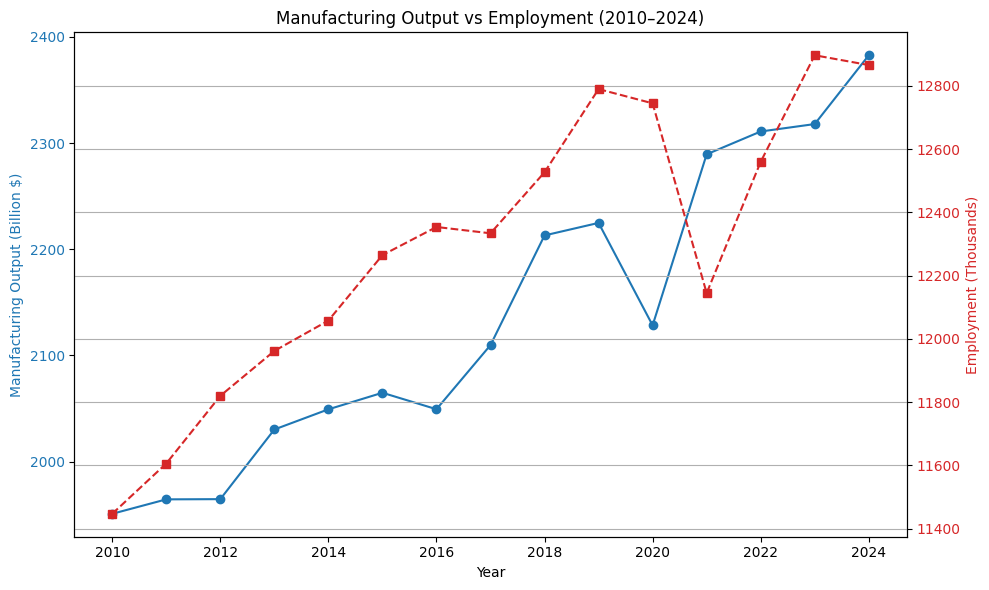

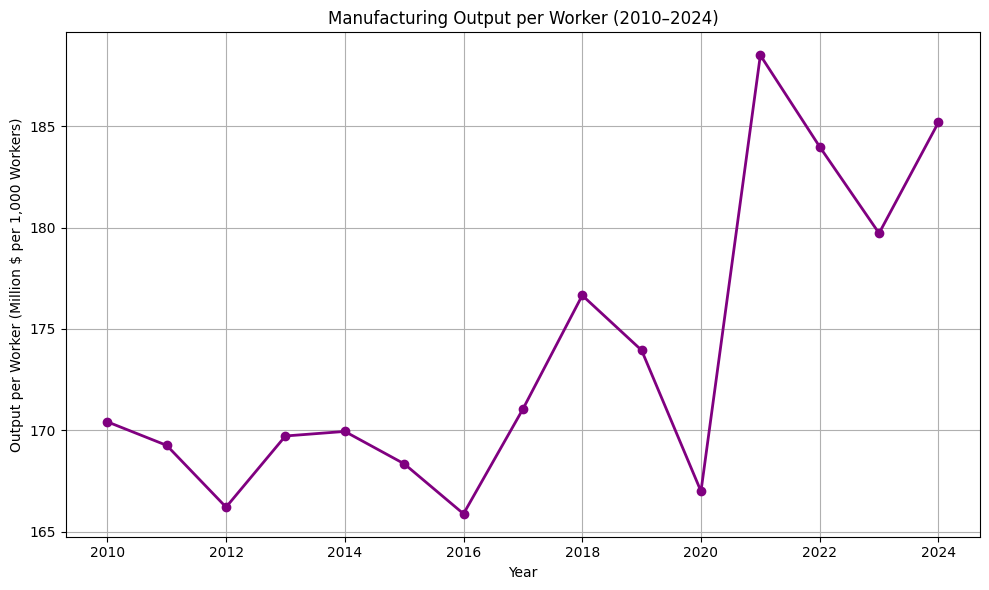

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Processed/Table_clean.csv")

df = df.drop(columns=["Unnamed: 16"], errors="ignore")

df_plot = df.set_index("Line").T.reset_index()
df_plot.rename(columns={"index": "Year"}, inplace=True)


df_plot.columns = [col.strip() for col in df_plot.columns]

df_plot = df_plot[df_plot["Year"].apply(lambda x: str(x).isdigit())]
df_plot["Year"] = df_plot["Year"].astype(int)

df_plot["Gross domestic product"] = df_plot["Gross domestic product"].astype(float)
df_plot["Manufacturing"] = df_plot["Manufacturing"].astype(float)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Manufacturing Output (Billion $)", color="tab:blue")
ax1.plot(df_plot["Year"], df_plot["Manufacturing"], color="tab:blue", marker='o')
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Total GDP (Billion $)", color="tab:green")
ax2.plot(df_plot["Year"], df_plot["Gross domestic product"], color="tab:green", linestyle='--', marker='s')
ax2.tick_params(axis='y', labelcolor="tab:green")


ax1.axvline(x=2020, color='gray', linestyle='--', linewidth=1)
ax1.text(2020.1, df_plot[df_plot["Year"] == 2020]["Manufacturing"].values[0],
         "← COVID", color='gray', fontsize=9, verticalalignment='center')

plt.title("Real Manufacturing Output vs Total GDP (2010–2024)")
plt.grid(True)
fig.tight_layout()

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

df_jobs = pd.read_csv("../data/Processed/MANEMP.csv")
df_jobs["Year"] = pd.to_datetime(df_jobs["observation_date"]).dt.year
df_jobs["Month"] = pd.to_datetime(df_jobs["observation_date"]).dt.month

df_jobs_jan = df_jobs[df_jobs["Month"] == 1][["Year", "MANEMP"]]
df_jobs_jan = df_jobs_jan[df_jobs_jan["Year"].between(2010, 2024)]

df_joined = pd.merge(df_plot[["Year", "Manufacturing"]], df_jobs_jan, on="Year")

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Manufacturing Output (Billion $)", color="tab:blue")
ax1.plot(df_joined["Year"], df_joined["Manufacturing"], color="tab:blue", marker='o')
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Employment (Thousands)", color="tab:red")
ax2.plot(df_joined["Year"], df_joined["MANEMP"], color="tab:red", linestyle='--', marker='s')
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.title("Manufacturing Output vs Employment (2010–2024)")
plt.grid(True)
plt.tight_layout()
plt.show()

df_output = df_plot[["Year", "Manufacturing"]]
df_employment = df_jobs_jan[["Year", "MANEMP"]]
df_unit = pd.merge(df_output, df_employment, on="Year")

df_unit["Output_per_worker"] = (df_unit["Manufacturing"] * 1000) / df_unit["MANEMP"]  # 单位变为百万美元

plt.figure(figsize=(10, 6))
plt.plot(df_unit["Year"], df_unit["Output_per_worker"], marker='o', color='purple', linewidth=2)
plt.title("Manufacturing Output per Worker (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Output per Worker (Million $ per 1,000 Workers)")
plt.grid(True)
plt.tight_layout()
plt.show()